In [1]:
import pandas as pd
from sqlalchemy import create_engine
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

# Import user and password in cofig file
from config import host, user, pw, port

### Extract CSVs into DataFrames

In [2]:
airport_file = "Resources/airports.csv"
airline_file = "Resources/airlines.csv"
route_file = "Resources/routes.csv"
airport_df = pd.read_csv(airport_file)
airline_df = pd.read_csv(airline_file)
route_df = pd.read_csv(route_file)


In [3]:
airport_df.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [4]:
airport_df.columns

Index(['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone',
       'Type', 'Source'],
      dtype='object')

In [5]:
#Airport clean
# Create a filtered dataframe from specific columns
airport_cols = ['Airport ID','Name','City', 'Country','IATA','ICAO']
airport_trans= airport_df[airport_cols].copy()

# Rename the column headers
airport_trans = airport_trans.rename(columns={"Airport ID":"airport_id",
                                            "Name": "name",
                                            "City":"city",
                                            "ICAO":"iaco",
                                            "IATA":"iata",
                                             })

# Clean the data by dropping duplicates and setting the index
airport_trans.drop_duplicates("airport_id", inplace=False)
airports_list=airport_trans['airport_id']
airport_trans.set_index("airport_id", inplace=True)
#drop all the airlines that country is diferent than United States and drop the column country
airport_trans = airport_trans.loc[airport_trans["Country"]=="United States", :]
airport_trans=airport_trans.drop(['Country'], axis=1)
airport_trans.head()

,name,city,iata,iaco
airport_id,,,,
3411,Barter Island LRRS Airport,Barter Island,BTI,PABA
3412,Wainwright Air Station,Fort Wainwright,\N,PAWT
3413,Cape Lisburne LRRS Airport,Cape Lisburne,LUR,PALU
3414,Point Lay LRRS Airport,Point Lay,PIZ,PPIZ
3415,Hilo International Airport,Hilo,ITO,PHTO


In [6]:
airline_df.head()

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


In [7]:
airline_df.columns

Index(['Airline ID', 'Name', 'Alias', 'IATA', 'ICAO', 'Callsign', 'Country',
       'Active'],
      dtype='object')

In [8]:
#Airline clean
# Create a filtered dataframe from specific columns
airline_cols = ['Airline ID', 'Name', 'ICAO', 'IATA', 'Country', 'Active']
airline_trans= airline_df[airline_cols].copy()

# Rename the column headers
airline_trans = airline_trans.rename(columns={"Airline ID": "airline_id",
                                            "Name": "airline_name",
                                            "ICAO":"icao",
                                            "IATA":"iata",
                                            "Country":"country",
                                            "Active":"active"
                                             })

# Clean the data by dropping duplicates and setting the index
airline_trans.drop_duplicates("airline_id", inplace=True)
airline_trans.set_index("airline_id", inplace=True)
airline_trans=airline_trans.dropna()
#drop all the airlines that country is diferent than United States and drop the column country
airline_trans = airline_trans.loc[airline_trans["country"]=="United States", :]
airline_trans=airline_trans.drop(['country'], axis=1)
airline_trans.head()

,airline_name,icao,iata,active
airline_id,,,,
10,40-Mile Air,MLA,Q5,Y
22,Aloha Airlines,AAH,AQ,Y
24,American Airlines,AAL,AA,Y
35,Allegiant Air,AAY,G4,Y
49,Airborne Express,ABX,GB,N


In [9]:
route_df.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [10]:
route_df.columns

Index(['Airline', 'Airline ID', 'Source airport', 'Source airport ID',
       'Destination airport', 'Destination airport ID', 'Codeshare', 'Stops',
       'Equipment'],
      dtype='object')

In [11]:
#Route Clean
#covert to numeric routes 'Airline Id'
route_df['Airline ID']=pd.to_numeric(route_df['Airline ID'], errors='coerce')
#merge airline data with route data to connect with the country
merge_df=airline_df.merge(route_df, on='Airline ID')

# Create a filtered dataframe from specific columns
route_cols = ['Airline ID', 'Source airport', 'Source airport ID','Destination airport', 'Destination airport ID','Country']
route_trans=merge_df[route_cols].copy()
route_trans.reset_index(inplace=True)

# Rename the column headers
route_trans = route_trans.rename(columns={"index":"route_id",
                                          "Airline ID": "airline_id",
                                          "Source airport": "source_iata",
                                          "Destination airport":"destination_iata",
                                          "Source airport ID": "sour_airp_id",
                                          "Destination airport ID":"dest_airp_id",
                                          
                                             })

# Clean the data by dropping duplicates and setting the index
route_trans.set_index("route_id", inplace=True)
route_trans = route_trans.loc[route_trans["Country"]=="United States", :]
route_trans=route_trans.drop(['Country'], axis=1)
route_trans.head()

,airline_id,source_iata,sour_airp_id,destination_iata,dest_airp_id
route_id,,,,,
0,10,CKX,\N,TKJ,7235
1,10,FAI,3832,HKB,7242
2,10,HKB,7242,FAI,3832
3,10,TKJ,7235,CKX,\N
76,24,ABE,4355,CLT,3876


In [12]:
#get url of postgersql database
url = 'postgresql://{}:{}@{}:{}/{}'
url = url.format(user, pw, host, port, 'airport_db')
engine = create_engine(url)

In [13]:
# Confirm tables
engine.table_names()

['airports', 'airlines', 'routes']

### Load DataFrames into database

In [14]:
airport_trans.to_sql(name='airports', con=engine, if_exists='append', index=True)

In [15]:
airline_trans.to_sql(name='airlines', con=engine, if_exists='append', index=True)

In [16]:
route_trans.to_sql(name='routes', con=engine, if_exists='append', index=True)

In [17]:
#get the data from airport database
#Select the numbers of routes by airlines
query = '''SELECT a.airline_name, COUNT(r.route_id) as total
FROM airlines a
INNER JOIN routes r 
ON a.airline_id = r.airline_id
GROUP BY a.airline_id
ORDER BY a.airline_name ASC;'''

airline_routes_df=pd.read_sql(query, engine)
group_airline_df=airline_routes_df.set_index('airline_name',inplace=True)
airline_routes_df.head()

,total
airline_name,
40-Mile Air,4
Air Choice One,10
Air Florida,34
AirTran Airways,726
Alaska Central Express,2


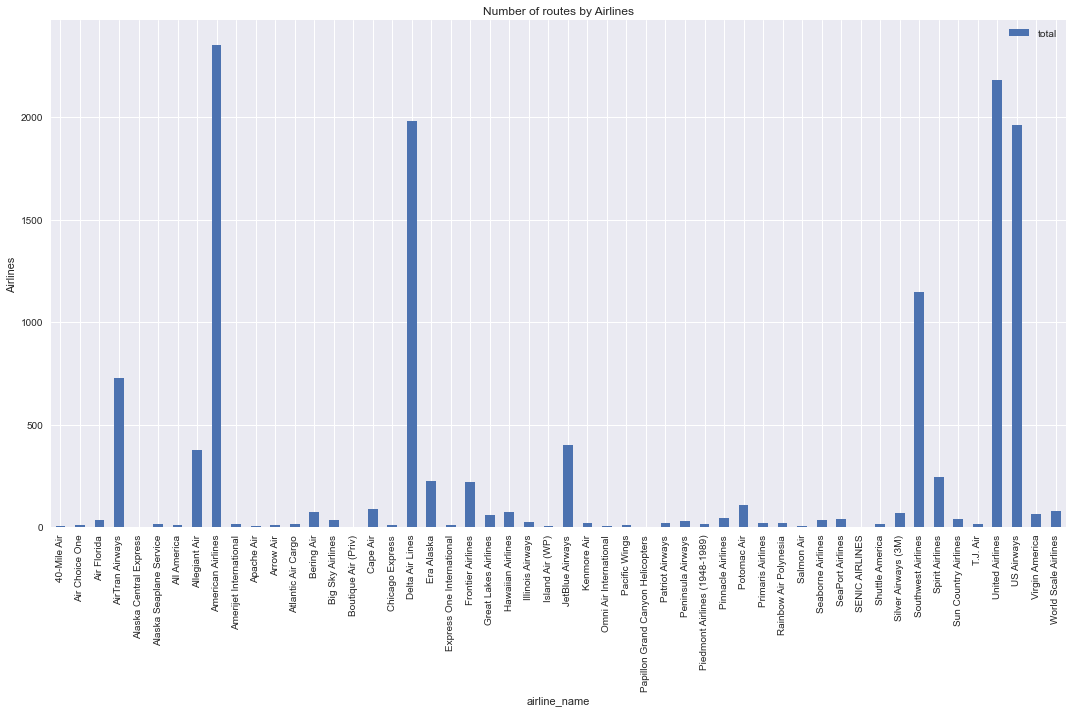

In [18]:
airline_routes_df.plot.bar(title="Number of routes by Airlines", figsize=(15,10))
plt.ylabel('Number of routes')
plt.ylabel('Airlines')
plt.tight_layout()
plt.savefig("Output/airlinesroutes.png")
plt.show()

In [19]:
#get the data from employees
query = '''SELECT a.city, COUNT(r.dest_airp_id) as total
FROM airports a
INNER JOIN routes r
ON (a.airport_id=r.sour_airp_id)
GROUP BY a.city
ORDER BY total DESC;'''

city_routes_df=pd.read_sql(query, engine)
group_city_routes_df=city_routes_df.set_index('city',inplace=True)
city_routes_df.head()

,total
city,
Chicago,576
New York,436
Dallas-Fort Worth,417
Atlanta,349
Denver,336


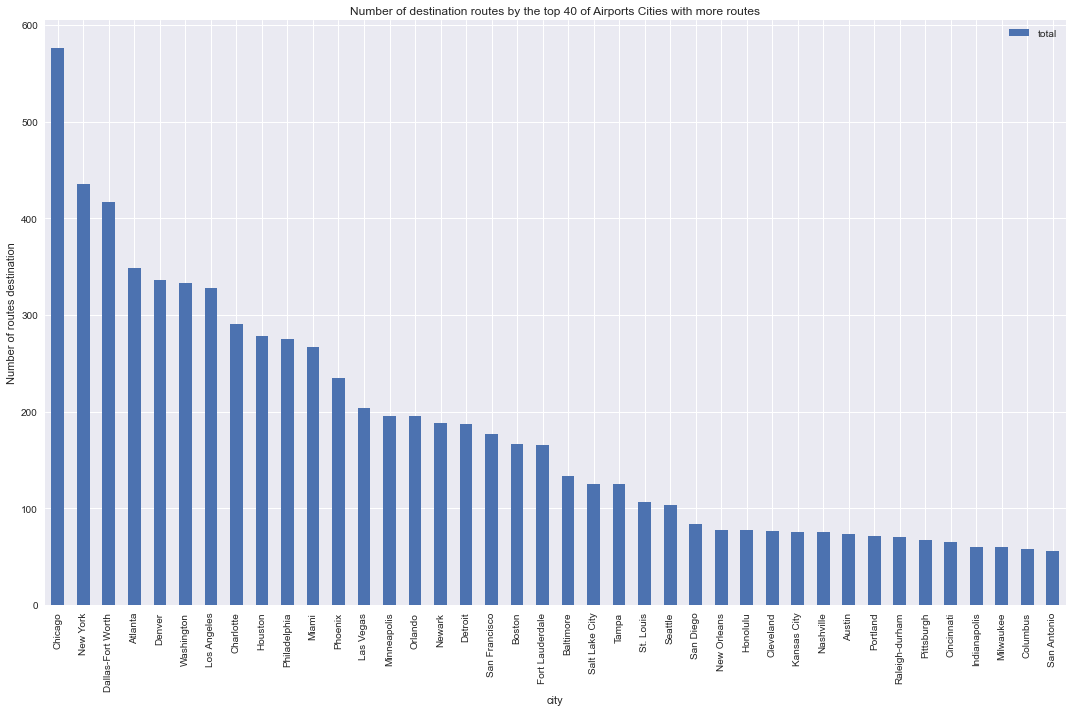

In [23]:
city_routes_df.head(40).plot.bar(title="Number of destination routes by the top 40 of Airports Cities with more routes",figsize=(15,10))
plt.ylabel('Number of routes destination')
plt.tight_layout()
plt.savefig("Output/citiesroutes.png")
plt.show()

In [24]:
#Select the routes by airport, showing the airline and the destination
query = '''SELECT a.name, a.city, a.iata, al.airline_name, l.name as "destination airport", l.city as "destination city", r.destination_iata as "destination iata"
FROM airports a
INNER JOIN routes r
ON (a.airport_id=r.sour_airp_id)
INNER JOIN airports l
ON (l.airport_id=r.dest_airp_id)
INNER JOIN airlines al
ON (r.airline_id=al.airline_id)
ORDER BY a.name ASC;'''


airport_routes_df=pd.read_sql(query, engine)
airport_routes_df = airport_routes_df.rename(columns={"name":"airport name","airline_name": "airline name"})
group_airport_routes_df=airport_routes_df.set_index('airport name',inplace=True)
airport_routes_df.head(20)

,city,iata,airline name,destination airport,destination city,destination iata
airport name,,,,,,
Aberdeen Regional Airport,Aberdeen,ABR,Delta Air Lines,Minneapolis-St Paul International/Wold-Chamber...,Minneapolis,MSP
Abilene Regional Airport,Abilene,ABI,US Airways,Dallas Fort Worth International Airport,Dallas-Fort Worth,DFW
Abilene Regional Airport,Abilene,ABI,American Airlines,Dallas Fort Worth International Airport,Dallas-Fort Worth,DFW
Adirondack Regional Airport,Saranac Lake,SLK,Cape Air,General Edward Lawrence Logan International Ai...,Boston,BOS
Akron Canton Regional Airport,Akron,CAK,Delta Air Lines,Hartsfield Jackson Atlanta International Airport,Atlanta,ATL
Akron Canton Regional Airport,Akron,CAK,Delta Air Lines,Detroit Metropolitan Wayne County Airport,Detroit,DTW
Akron Canton Regional Airport,Akron,CAK,AirTran Airways,Tampa International Airport,Tampa,TPA
Akron Canton Regional Airport,Akron,CAK,AirTran Airways,Orlando International Airport,Orlando,MCO
Akron Canton Regional Airport,Akron,CAK,AirTran Airways,La Guardia Airport,New York,LGA


In [29]:
#convert query 
#convert the dataframe to html 
airportroutehtml=airport_routes_df.to_html()
#write html to file
text_file = open("airportroutes.html", "w")
text_file.write(airportroutehtml)
text_file.close()

In [30]:
airport_df

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [42]:
#convert airports
#convert the dataframe to html 
airporthtml=airport_trans.to_html()
#write html to file
text_file = open("airport.html", "w")
text_file.write(airporthtml)
text_file.close()

In [39]:
#convert airlines
#convert the dataframe to html 
airlinehtml=airline_trans.to_html()
#write html to file
text_file = open("airline.html", "w")
text_file.write(airlinehtml)
text_file.close()

In [40]:
#convert routes
#convert the dataframe to html 
routehtml=route_trans.to_html()
#write html to file
text_file = open("route.html", "w")
text_file.write(routehtml)
text_file.close()